In [245]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.signal import find_peaks, butter, lfilter, decimate
from scipy.fft import fft, ifft
import math
import numpy as np

In [246]:
def getPMDIRR(filename):
    df_pmdi = pd.read_csv(filename)
    df_pmdi['datetime'] = df_pmdi['TIME'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))
    df_pmdi['epoch'] = df_pmdi['datetime'].apply(lambda x: datetime.datetime.timestamp(x))
    # print(df_pmdi['RESP'].unique())
    df_pmdi = df_pmdi.drop(df_pmdi[df_pmdi['RESP'] == '^^'].index)
    df_pmdi['RR'] = df_pmdi['RESP'].apply(lambda x: float(x))
    return df_pmdi[['epoch', 'RR', 'datetime']]

In [247]:
def getDSTRR(filename):
    df_dst = pd.read_csv(filename)
    df_dst.drop(index=df_dst.index[0], axis=0, inplace=True)
    df_dst.drop_duplicates(inplace=True)
    df_dst.reset_index(drop=True, inplace=True)
    df_dst['datetime'] = df_dst['Timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
    return df_dst

In [248]:
def selectFile():
    root = Tk()
    root.withdraw()
    root.overrideredirect(True)
    root.geometry('0x0+0+0')
    root.deiconify()
    root.lift()
    root.focus_force()
    filename = askopenfilename(filetypes=[("Comma Seperated Values File", ".csv")], parent=root, initialdir=r"\\134.117.64.31\\Main Storage")
    root.destroy()
    if not filename:
        sys.exit("No file selected")

    return filename

In [249]:
df_PMDIRR = getPMDIRR(selectFile())
df_test = df_PMDIRR.head(32)
print(df_test)

           epoch     RR            datetime
0   1.527540e+09  117.0 2018-05-28 16:41:50
1   1.527540e+09  112.0 2018-05-28 16:41:51
2   1.527540e+09  112.0 2018-05-28 16:41:52
3   1.527540e+09   96.0 2018-05-28 16:41:53
4   1.527540e+09   96.0 2018-05-28 16:41:54
5   1.527540e+09   96.0 2018-05-28 16:41:55
6   1.527540e+09   59.0 2018-05-28 16:41:56
7   1.527540e+09   56.0 2018-05-28 16:41:57
8   1.527540e+09   54.0 2018-05-28 16:41:58
9   1.527540e+09   85.0 2018-05-28 16:41:59
10  1.527540e+09  113.0 2018-05-28 16:42:00
11  1.527540e+09  113.0 2018-05-28 16:42:01
12  1.527540e+09  105.0 2018-05-28 16:42:02
13  1.527540e+09  138.0 2018-05-28 16:42:03
14  1.527540e+09  135.0 2018-05-28 16:42:04
15  1.527540e+09  141.0 2018-05-28 16:42:05
16  1.527540e+09  138.0 2018-05-28 16:42:06
17  1.527540e+09  135.0 2018-05-28 16:42:07
18  1.527540e+09  129.0 2018-05-28 16:42:08
19  1.527540e+09  120.0 2018-05-28 16:42:09
20  1.527540e+09  120.0 2018-05-28 16:42:10
21  1.527540e+09  117.0 2018-05-

In [250]:
df_DSTRR = getDSTRR(selectFile())
df_test = df_DSTRR.head(32)
print(df_test)

                     Timestamp   Mean Depth                   datetime
0   2018-05-28 17:48:45.533667  3977.827375 2018-05-28 17:48:45.533667
1   2018-05-28 17:48:45.600333  3977.827375 2018-05-28 17:48:45.600333
2   2018-05-28 17:48:45.667000  3977.827375 2018-05-28 17:48:45.667000
3   2018-05-28 17:48:45.733667  3980.188435 2018-05-28 17:48:45.733667
4   2018-05-28 17:48:45.800333  3994.009077 2018-05-28 17:48:45.800333
5   2018-05-28 17:48:45.867000  3994.009077 2018-05-28 17:48:45.867000
6   2018-05-28 17:48:45.933667  3782.233214 2018-05-28 17:48:45.933667
7   2018-05-28 17:48:46.000333  3782.233214 2018-05-28 17:48:46.000333
8   2018-05-28 17:48:46.667000  4100.047796 2018-05-28 17:48:46.667000
9   2018-05-28 17:48:46.733667  4100.047796 2018-05-28 17:48:46.733667
10  2018-05-28 17:48:46.800333  4015.394001 2018-05-28 17:48:46.800333
11  2018-05-28 17:48:46.867000  4015.394001 2018-05-28 17:48:46.867000
12  2018-05-28 17:48:46.933667  4008.272748 2018-05-28 17:48:46.933667
13  20

In [251]:
df_DSTRR['datetime']

0       2018-05-28 17:48:45.533667
1       2018-05-28 17:48:45.600333
2       2018-05-28 17:48:45.667000
3       2018-05-28 17:48:45.733667
4       2018-05-28 17:48:45.800333
                   ...            
75207   2018-05-28 19:25:26.933667
75208   2018-05-28 19:25:27.000333
75209   2018-05-28 19:25:27.067000
75210   2018-05-28 19:25:27.133667
75211   2018-05-28 19:25:27.200333
Name: datetime, Length: 75212, dtype: datetime64[ns]

In [252]:
testRec = df_DSTRR['datetime'].iloc[0].to_pydatetime()
print(testRec)
print(type(testRec))

2018-05-28 17:48:45.533667
<class 'datetime.datetime'>


In [253]:
df_PMDIRR_seg = df_PMDIRR.loc[df_PMDIRR['datetime'] >= df_DSTRR['datetime'].iloc[0].to_pydatetime()]
df_PMDIRR_seg = df_PMDIRR_seg.loc[df_PMDIRR_seg['datetime'] <= df_DSTRR['datetime'].iloc[-1].to_pydatetime()]
df_PMDIRR_seg.dropna(subset=['RR'], inplace=True)

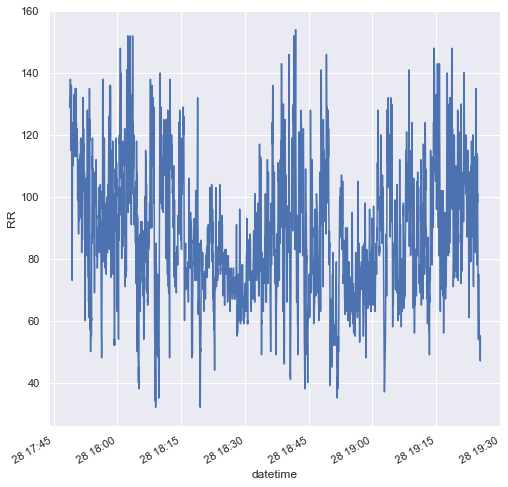

In [254]:
sns.set_theme(style='darkgrid')
g = sns.relplot(x="datetime", y="RR", kind="line", data=df_PMDIRR_seg, height=7.5)
g.figure.autofmt_xdate()

In [255]:
# df_DSTRR_seg = df_DSTRR.loc[df_DSTRR['datetime'] >= datetime.datetime.fromisoformat('2019-01-07T12:23:40')]
print("PMDI RR first record: {}\nDST Avg Torso Depth first record: {}".format(df_PMDIRR_seg.iloc[0], df_DSTRR.iloc[0]))
print("PMDI RR last record: {}\nDST Avg Torso Depth last record: {}".format(df_PMDIRR_seg.iloc[-1], df_DSTRR.iloc[-1]))

PMDI RR first record: epoch              1527544126.0
RR                        129.0
datetime    2018-05-28 17:48:46
Name: 3944, dtype: object
DST Avg Torso Depth first record: Timestamp     2018-05-28 17:48:45.533667
Mean Depth                   3977.827375
datetime      2018-05-28 17:48:45.533667
Name: 0, dtype: object
PMDI RR last record: epoch              1527549927.0
RR                         55.0
datetime    2018-05-28 19:25:27
Name: 9643, dtype: object
DST Avg Torso Depth last record: Timestamp     2018-05-28 19:25:27.200333
Mean Depth                   3715.203837
datetime      2018-05-28 19:25:27.200333
Name: 75211, dtype: object


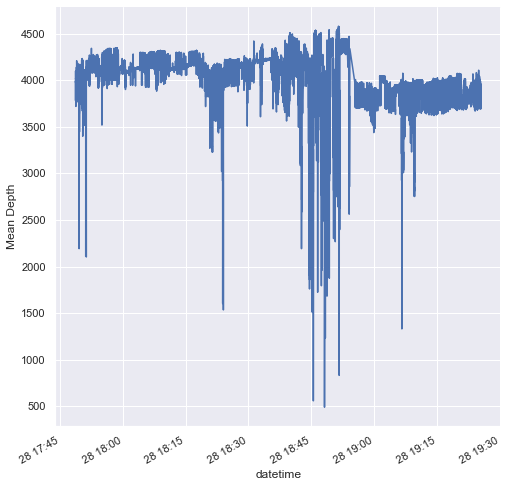

In [256]:
sns.set_theme(style='darkgrid')
g = sns.relplot(x='datetime', y='Mean Depth', kind='line', data=df_DSTRR, height=7.5)
g.figure.autofmt_xdate()

In [257]:
df_DSTRR.head()

,Timestamp,Mean Depth,datetime
0,2018-05-28 17:48:45.533667,3977.827375,2018-05-28 17:48:45.533667
1,2018-05-28 17:48:45.600333,3977.827375,2018-05-28 17:48:45.600333
2,2018-05-28 17:48:45.667000,3977.827375,2018-05-28 17:48:45.667000
3,2018-05-28 17:48:45.733667,3980.188435,2018-05-28 17:48:45.733667
4,2018-05-28 17:48:45.800333,3994.009077,2018-05-28 17:48:45.800333


In [258]:
# Use band pass filter to remove high and low frequency artifacts;
def butter_bandpass(lowCut, highCut, fs, order=2):
    nyq = 0.5 * fs
    low = lowCut/nyq
    high = highCut/nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowCut, highCut, fs, order=2):
    b, a = butter_bandpass(lowCut, highCut, fs, order=order)
    y = lfilter(b, a, data)
    return y

lowFreq = 0.35
highFreq = 1.8
fs = 15

In [259]:
# Find RR
# Since framerate is 15 FPS, each second contains 15 samples
# Each peak needs to be a minimum of 3 samples away from the last
# Works out to a maximum BPM of 150 (Neonatal limit is around 135 BPM)
def estRR_timeDomain(df, window=150):
    estimatedRRs = []
    timestamps = []
    for window in df.rolling(window):
        windowMean = window['Mean Depth'].mean()
        window.loc[:, 'Loaded Depth'] = window['Mean Depth'].apply(lambda x: x - windowMean)
        window.loc[:, 'Filtered Signal'] = butter_bandpass_filter(window['Loaded Depth'], lowFreq, highFreq, fs)
        
        peaks, peak_props = find_peaks(window['Filtered Signal'], distance=3)
        if len(peaks) > 1:
            estRR = (((len(peaks) - 1) * 15) / (peaks[-1] - peaks[0])) * 60
            estimatedRRs.append(estRR)
            timestamps.append(window.iloc[-1]['datetime'])

    d = {'timestamps': timestamps, 'RR': estimatedRRs}
    df_estimatedRRs = pd.DataFrame(d)
    return df_estimatedRRs

In [260]:
df_est_td = estRR_timeDomain(df_DSTRR)
df_est_td.drop_duplicates(inplace=True)
df_est_td.reset_index(drop=True, inplace=True)


print(df_est_td.head())

C:\Users\zeinhajjali-admin\anaconda3\envs\RS\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


                  timestamps          RR
0 2018-05-28 17:48:47.000333  128.571429
1 2018-05-28 17:48:47.067000  128.571429
2 2018-05-28 17:48:47.133667  128.571429
3 2018-05-28 17:48:47.200333  128.571429
4 2018-05-28 17:48:47.267000  128.571429


In [261]:
def nextpow2(x):
    x = int(x)
    return 1 if x == 0 else 2**(x-1).bit_length()

In [262]:
# Find RR using Amente's frequency domain method:
def estRR_freqDomain(df, window=1024):
    estimatedRRs = []
    timestamps = []
    for window in df.rolling(window):
        windowMean = window['Mean Depth'].mean()
        window.loc[:, 'Loaded Depth'] = window['Mean Depth'].apply(lambda x: x - windowMean)
        window.loc[:, 'Filtered Signal'] = butter_bandpass_filter(window['Loaded Depth'], lowFreq, highFreq, fs)

        L1 = len(window['Filtered Signal'])
        n1 = nextpow2(max(L1, (60*fs)))
        fft_signal = fft(window['Filtered Signal'].values, n=n1)
        f = fs * (np.array(range(int(n1/2) + 1))) / n1
        P = np.abs(fft_signal/n1)
        P1 = P[0:int(n1/2)]
        P1[1:-1] = 2 * P1[1:-1]

        largestPeak_idx = P.argmax()
        if largestPeak_idx.size != 1:
            largestPeak_idx = largestPeak_idx[0]

        estRR = f[largestPeak_idx] * 60
        estimatedRRs.append(estRR)
        timestamps.append(window.iloc[-1]['datetime'])

    d = {'timestamps': timestamps, 'RR': estimatedRRs}
    df_estimatedRRs = pd.DataFrame(d)
    return df_estimatedRRs

In [263]:
df_est_fd = estRR_freqDomain(df_DSTRR)
df_est_fd.drop_duplicates(inplace=True)
df_est_fd.reset_index(drop=True, inplace=True)


print(df_est_fd.head())

C:\Users\zeinhajjali-admin\anaconda3\envs\RS\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


                  timestamps        RR
0 2018-05-28 17:48:45.533667  0.000000
1 2018-05-28 17:48:45.600333  0.000000
2 2018-05-28 17:48:45.667000  0.000000
3 2018-05-28 17:48:45.733667  0.878906
4 2018-05-28 17:48:45.800333  0.878906


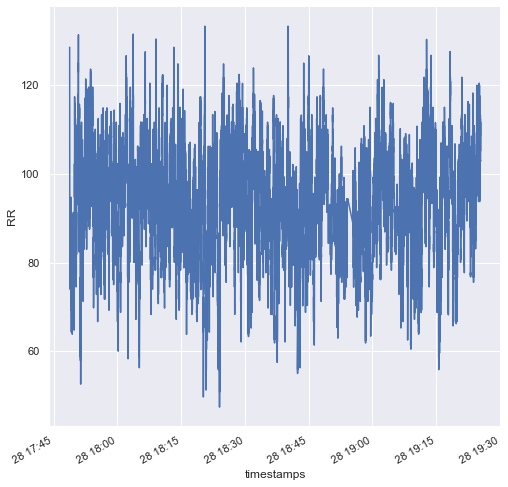

In [264]:
g = sns.relplot(x='timestamps', y='RR', kind='line', data=df_est_td, height=7.5)
g.figure.autofmt_xdate()

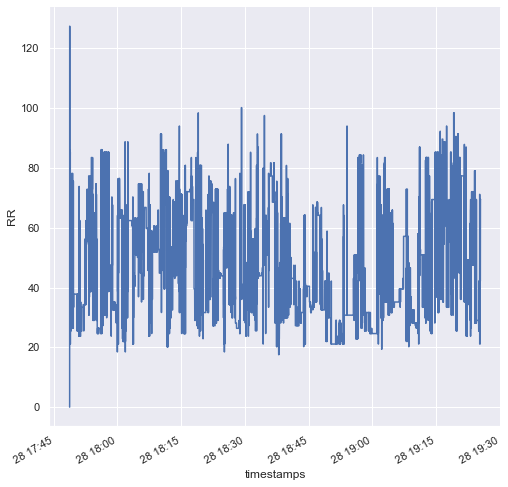

In [265]:
g = sns.relplot(x='timestamps', y='RR', kind='line', data=df_est_fd, height=7.5)
g.figure.autofmt_xdate()

In [266]:
df_PMDIRR_seg.describe()

,epoch,RR
count,5.451000e+03,5451.000000
mean,1.527547e+09,88.734544
std,1.685611e+03,20.664382
min,1.527544e+09,32.000000
25%,1.527546e+09,74.000000
50%,1.527547e+09,87.000000
75%,1.527548e+09,103.000000
max,1.527550e+09,154.000000


In [267]:
df_PMDIRR_seg.head()

,epoch,RR,datetime
3944,1.527544e+09,129.0,2018-05-28 17:48:46
3945,1.527544e+09,130.0,2018-05-28 17:48:47
3946,1.527544e+09,132.0,2018-05-28 17:48:48
3947,1.527544e+09,130.0,2018-05-28 17:48:49
3948,1.527544e+09,130.0,2018-05-28 17:48:50


In [268]:
df_est_td.loc[:, 'timestamps'] = df_est_td['timestamps'].apply(lambda x: x.round(freq='S'))
df_est_td.drop_duplicates(subset='timestamps', inplace=True)
df_est_td.reset_index(drop=True, inplace=True)
df_est_td.describe()

,RR
count,5624.000000
mean,93.215372
std,12.044930
min,47.368421
25%,85.039370
50%,93.831522
75%,101.503759
max,130.534351


In [269]:
df_est_td.head()

,timestamps,RR
0,2018-05-28 17:48:47,128.571429
1,2018-05-28 17:48:48,128.571429
2,2018-05-28 17:48:49,105.882353
3,2018-05-28 17:48:50,87.804878
4,2018-05-28 17:48:51,88.235294


In [270]:
df_est_fd.loc[:, 'timestamps'] = df_est_fd['timestamps'].apply(lambda x: x.round(freq='S'))
df_est_fd.drop_duplicates(subset='timestamps', inplace=True)
df_est_fd.reset_index(drop=True, inplace=True)
df_est_fd.describe()

,RR
count,5625.000000
mean,47.394844
std,17.894480
min,0.000000
25%,32.519531
50%,43.945312
75%,63.281250
max,100.195312


In [271]:
df_est_fd.head()

,timestamps,RR
0,2018-05-28 17:48:46,0.000000
1,2018-05-28 17:48:47,87.011719
2,2018-05-28 17:48:48,67.675781
3,2018-05-28 17:48:49,36.035156
4,2018-05-28 17:48:50,83.496094


In [296]:
df_est_td = df_est_td[df_est_td['timestamps'].isin(df_PMDIRR_seg['datetime'])]
print(df_est_td.describe())

df_est_fd = df_est_fd[df_est_fd['timestamps'].isin(df_est_td['timestamps'])]
print(df_est_fd.describe())

df_PMDIRR_seg = df_PMDIRR_seg[df_PMDIRR_seg['datetime'].isin(df_est_td['timestamps'])]
print(df_PMDIRR_seg.describe())

                RR
count  5283.000000
mean     93.248671
std      12.054275
min      47.368421
25%      85.039370
50%      94.029851
75%     101.503759
max     130.534351
                RR
count  5283.000000
mean     47.641610
std      17.792956
min      17.578125
25%      32.519531
50%      43.945312
75%      63.281250
max     100.195312
              epoch           RR
count  5.283000e+03  5283.000000
mean   1.527547e+09    89.173008
std    1.698477e+03    20.653640
min    1.527544e+09    32.000000
25%    1.527545e+09    75.000000
50%    1.527547e+09    88.000000
75%    1.527548e+09   103.000000
max    1.527550e+09   154.000000


In [291]:
def MAE_rr(est_rr, pmdi_rr, sec=0):
    # Downsample records so that both sets have the same number
    # All record timestamps should be available in both sets as well
    est_rr = est_rr[est_rr['timestamps'].isin(pmdi_rr['datetime'])]
    pmdi_rr = pmdi_rr[pmdi_rr['datetime'].isin(est_rr['timestamps'])]
    print(len(pmdi_rr))

    if sec == 0 or sec > est_rr.shape[0]:
        sec = est_rr.shape[0]

    j = 0
    MAEs = []
    while j < pmdi_rr.shape[0]:
        for i in range(j+1, pmdi_rr.shape[0]):
            if (pmdi_rr['datetime'].iloc[i] - pmdi_rr['datetime'].iloc[j]).total_seconds() >= sec:
                interval = i - j + 1
                print(interval)
                mae = (abs(np.sum(est_rr['RR'].iloc[j:i+1].values - pmdi_rr['RR'].iloc[j:i+1].values))) / interval
                MAEs.append(mae)
                if i == pmdi_rr.shape[0] - 1:
                    j = i + 1
                else:
                    j = i
                break
            elif i == pmdi_rr.shape[0] - 1:
                j = pmdi_rr.shape[0]
                break
    return MAEs

In [274]:
def pae_calc(mae_list, threshold=5):
    MAEs = np.array(mae_list)
    MAE_filter = MAEs <= threshold
    percentageAcceptable = (MAEs[MAE_filter].size) / MAEs.size
    return percentageAcceptable

In [275]:
print("Time domain method")
PAEs_td = []
for sec in range(1, 121):
    mae = MAE_rr(df_est_td, df_PMDIRR_seg, sec=sec)
    pae = pae_calc(mae, threshold=5)
    PAEs_td.append(pae)

    print("For sec={}; pae={}".format(sec, pae))

Time domain method
For sec=1; pae=0.1707686482393033
For sec=2; pae=0.17164179104477612
For sec=3; pae=0.17417918753478018
For sec=4; pae=0.18067846607669616
For sec=5; pae=0.1729185727355901
For sec=6; pae=0.16849015317286653
For sec=7; pae=0.1685823754789272
For sec=8; pae=0.17851959361393324
For sec=9; pae=0.1781045751633987
For sec=10; pae=0.18083182640144665
For sec=11; pae=0.17391304347826086
For sec=12; pae=0.19438444924406048
For sec=13; pae=0.1822429906542056
For sec=14; pae=0.1975
For sec=15; pae=0.1774193548387097
For sec=16; pae=0.20285714285714285
For sec=17; pae=0.20303030303030303
For sec=18; pae=0.2057877813504823
For sec=19; pae=0.2
For sec=20; pae=0.20921985815602837
For sec=21; pae=0.2126865671641791
For sec=22; pae=0.20622568093385213
For sec=23; pae=0.2032520325203252
For sec=24; pae=0.22033898305084745
For sec=25; pae=0.24444444444444444
For sec=26; pae=0.22119815668202766
For sec=27; pae=0.19523809523809524
For sec=28; pae=0.22167487684729065
For sec=29; pae=0.23

In [276]:
print("Freq domain method")
PAEs_fd = []
for sec in range(1, 121):
    mae = MAE_rr(df_est_fd, df_PMDIRR_seg, sec=sec)
    pae = pae_calc(mae, threshold=5)
    PAEs_fd.append(pae)

    print("For sec={}; pae={}".format(sec, pae))

Freq domain method
For sec=1; pae=0.047519878833775085
For sec=2; pae=0.04664179104477612
For sec=3; pae=0.041736227045075125
For sec=4; pae=0.03392330383480826
For sec=5; pae=0.04117108874656908
For sec=6; pae=0.037199124726477024
For sec=7; pae=0.038314176245210725
For sec=8; pae=0.036284470246734396
For sec=9; pae=0.04084967320261438
For sec=10; pae=0.0379746835443038
For sec=11; pae=0.03557312252964427
For sec=12; pae=0.0367170626349892
For sec=13; pae=0.035046728971962614
For sec=14; pae=0.025
For sec=15; pae=0.024193548387096774
For sec=16; pae=0.025714285714285714
For sec=17; pae=0.024242424242424242
For sec=18; pae=0.01929260450160772
For sec=19; pae=0.013559322033898305
For sec=20; pae=0.03546099290780142
For sec=21; pae=0.04477611940298507
For sec=22; pae=0.01556420233463035
For sec=23; pae=0.028455284552845527
For sec=24; pae=0.029661016949152543
For sec=25; pae=0.02666666666666667
For sec=26; pae=0.03225806451612903
For sec=27; pae=0.023809523809523808
For sec=28; pae=0.029

In [277]:
df_csv = pd.DataFrame({'ROI Depth TD': PAEs_td}, index=range(1,121))
df_csv['ROI Depth FD'] = PAEs_fd

In [278]:
df_csv.to_csv('roi_depth_13_pae.csv')

In [279]:
df_est_td.to_csv('roi_depth_13_rr_td.csv')
df_est_fd.to_csv('roi_depth_13_rr_fd.csv')
# df_PMDIRR_seg.to_csv('p13_rr_pmdi.csv')

In [292]:
mae = MAE_rr(df_est_fd, df_PMDIRR_seg, sec=10)

5283
11
10
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
11
11
11
10
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
10
11
11
10
11
11
11
11
11
11
11
11
11
11
6
11
11
11
11
10
10
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
7
10
11
11
11
11
8
11
10
11
11
9
11
11
11
10
11
11
11
11
11
11
10
11
11
11
9
11
10
11
11
11
10
11
11
11
11
10
11
11
11
11
10
11
11
11
11
11
10
11
11
11
10
11
11
11
11
10
11
11
11
11
11
10
11
11
11
11
10
11
11
11
11
10
7
11
11
11
11
11
11
10
11
11
11
11
11
8
10
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
10
11
11
11
11
11
11
10
11
11
11
11
11
10
11
10
11
7
11
11
11
11
11
10
10
8
11
11
11
10
11
11
10
11
11
11
10
11
11
11
11
11
11
10
11
11
11

In [294]:
def MAE_rr_seg(est_rr, pmdi_rr, sec=0):
    # Downsample records so that both sets have the same number
    # All record timestamps should be available in both sets as well
    df_acc = pd.DataFrame()
    est_rr = est_rr[est_rr['timestamps'].isin(pmdi_rr['datetime'])]
    pmdi_rr = pmdi_rr[pmdi_rr['datetime'].isin(est_rr['timestamps'])]
    print(len(pmdi_rr))

    if sec == 0 or sec > est_rr.shape[0]:
        sec = est_rr.shape[0]

    j = 0
    MAEs = []
    while j < pmdi_rr.shape[0]:
        for i in range(j+1, pmdi_rr.shape[0]):
            if (pmdi_rr['datetime'].iloc[i] - pmdi_rr['datetime'].iloc[j]).total_seconds() >= sec:
                interval = i - j + 1
                print(interval)
                mae = (abs(np.sum(est_rr['RR'].iloc[j:i+1].values - pmdi_rr['RR'].iloc[j:i+1].values))) / interval
                MAEs.append(mae)
                data = pd.DataFrame([{"i": i, "j": j, "mae": mae}])
                df_acc = df_acc.append(data)
                if i == pmdi_rr.shape[0] - 1:
                    j = i + 1
                else:
                    j = i
                break
            elif i == pmdi_rr.shape[0] - 1:
                j = pmdi_rr.shape[0]
                break
    return MAEs, df_acc

In [ ]:
maes, df_acc = MAE_rr(df_p21_roi_fd_rr, df_p21_pmdi_rr, sec=25)

In [295]:
df_est_fd

,timestamps,RR
1,2018-05-28 17:48:47,87.011719
2,2018-05-28 17:48:48,67.675781
3,2018-05-28 17:48:49,36.035156
4,2018-05-28 17:48:50,83.496094
5,2018-05-28 17:48:51,82.617188
...,...,...
5619,2018-05-28 19:25:22,42.187500
5620,2018-05-28 19:25:23,42.187500
5621,2018-05-28 19:25:24,42.187500
5623,2018-05-28 19:25:26,69.433594
